## 1. Collecting Data from Websites

In [ ]:
import requests
u = "http://neopythonic.blogspot.com/"
s = requests.get(u).content.decode('utf-8')
s

'<!DOCTYPE html>\n<html class=\'v2\' dir=\'ltr\' lang=\'en\'>\n<head>\n<link href=\'https://www.blogger.com/static/v1/widgets/2975350028-css_bundle_v2.css\' rel=\'stylesheet\' type=\'text/css\'/>\n<meta content=\'width=1100\' name=\'viewport\'/>\n<meta content=\'text/html; charset=UTF-8\' http-equiv=\'Content-Type\'/>\n<meta content=\'blogger\' name=\'generator\'/>\n<link href=\'http://neopythonic.blogspot.com/favicon.ico\' rel=\'icon\' type=\'image/x-icon\'/>\n<link href=\'http://neopythonic.blogspot.com/\' rel=\'canonical\'/>\n<link rel="alternate" type="application/atom+xml" title="Neopythonic - Atom" href="http://neopythonic.blogspot.com/feeds/posts/default" />\n<link rel="alternate" type="application/rss+xml" title="Neopythonic - RSS" href="http://neopythonic.blogspot.com/feeds/posts/default?alt=rss" />\n<link rel="service.post" type="application/atom+xml" title="Neopythonic - Atom" href="https://draft.blogger.com/feeds/4195135246107166251/posts/default" />\n<link rel="me" href="h

### 1.1 Parsing using String Splits 

In [ ]:
html = s
html_parts = html.split("h3 class='post-title entry-title")

def get_title(html):
    h = html.split("</h3>")[0]
    #h = html.split("</h3>")
    #print(h)
    print("After first split:\n %s\n" % h)
    h = h.split("'>")[2]
    #h = h.split("'>")
    print(h)
    return h.replace("</a>", "").strip()


l = [get_title(i) for i in html_parts[1:]]
l
    

After first split:
 ' itemprop='name'>
<a href='http://neopythonic.blogspot.com/2022/10/reasoning-about-asynciosemaphore.html'>Reasoning about asyncio.Semaphore</a>


Reasoning about asyncio.Semaphore</a>

After first split:
 ' itemprop='name'>
<a href='http://neopythonic.blogspot.com/2022/02/meeting-mike-burrows.html'>Meeting Mike Burrows</a>


Meeting Mike Burrows</a>

After first split:
 ' itemprop='name'>
<a href='http://neopythonic.blogspot.com/2019/03/why-operators-are-useful.html'>Why operators are useful</a>


Why operators are useful</a>

After first split:
 ' itemprop='name'>
<a href='http://neopythonic.blogspot.com/2018/11/what-do-do-with-your-computer-science.html'>What to do with your computer science career</a>


What to do with your computer science career</a>

After first split:
 ' itemprop='name'>
<a href='http://neopythonic.blogspot.com/2016/07/about-spammers-and-comments.html'>About spammers and comments</a>


About spammers and comments</a>

After first split:
 ' it

['Reasoning about asyncio.Semaphore',
 'Meeting Mike Burrows',
 'Why operators are useful',
 'What to do with your computer science career',
 'About spammers and comments',
 'Union syntax',
 'Adding type annotations for fspath']

In [ ]:
html_parts

['<!DOCTYPE html>\n<html class=\'v2\' dir=\'ltr\' lang=\'en\'>\n<head>\n<link href=\'https://www.blogger.com/static/v1/widgets/2975350028-css_bundle_v2.css\' rel=\'stylesheet\' type=\'text/css\'/>\n<meta content=\'width=1100\' name=\'viewport\'/>\n<meta content=\'text/html; charset=UTF-8\' http-equiv=\'Content-Type\'/>\n<meta content=\'blogger\' name=\'generator\'/>\n<link href=\'http://neopythonic.blogspot.com/favicon.ico\' rel=\'icon\' type=\'image/x-icon\'/>\n<link href=\'http://neopythonic.blogspot.com/\' rel=\'canonical\'/>\n<link rel="alternate" type="application/atom+xml" title="Neopythonic - Atom" href="http://neopythonic.blogspot.com/feeds/posts/default" />\n<link rel="alternate" type="application/rss+xml" title="Neopythonic - RSS" href="http://neopythonic.blogspot.com/feeds/posts/default?alt=rss" />\n<link rel="service.post" type="application/atom+xml" title="Neopythonic - Atom" href="https://draft.blogger.com/feeds/4195135246107166251/posts/default" />\n<link rel="me" href="

### 1.2 Parsing using Regular Expressions

### [Regex Online](https://regex101.com/)


In [ ]:
import re
r = re.compile(r"<h3 class='post-title entry-title'.*?>.*?>(.*?)</a><\/h3>")
r.findall(html.replace("\r","").replace("\n",""))

['Reasoning about asyncio.Semaphore',
 'Meeting Mike Burrows',
 'Why operators are useful',
 'What to do with your computer science career',
 'About spammers and comments',
 'Union syntax',
 'Adding type annotations for fspath']

### 1.3 Parsing using BeautifulSoup

In [ ]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(html, 'html.parser')
l = soup.findAll('h3', attrs={'class': 'post-title entry-title'})
l

[<h3 class="post-title entry-title" itemprop="name">
 <a href="http://neopythonic.blogspot.com/2022/10/reasoning-about-asynciosemaphore.html">Reasoning about asyncio.Semaphore</a>
 </h3>, <h3 class="post-title entry-title" itemprop="name">
 <a href="http://neopythonic.blogspot.com/2022/02/meeting-mike-burrows.html">Meeting Mike Burrows</a>
 </h3>, <h3 class="post-title entry-title" itemprop="name">
 <a href="http://neopythonic.blogspot.com/2019/03/why-operators-are-useful.html">Why operators are useful</a>
 </h3>, <h3 class="post-title entry-title" itemprop="name">
 <a href="http://neopythonic.blogspot.com/2018/11/what-do-do-with-your-computer-science.html">What to do with your computer science career</a>
 </h3>, <h3 class="post-title entry-title" itemprop="name">
 <a href="http://neopythonic.blogspot.com/2016/07/about-spammers-and-comments.html">About spammers and comments</a>
 </h3>, <h3 class="post-title entry-title" itemprop="name">
 <a href="http://neopythonic.blogspot.com/2016/05

In [ ]:
#Getting the titles
[t.text.strip() for t in l]

['Reasoning about asyncio.Semaphore',
 'Meeting Mike Burrows',
 'Why operators are useful',
 'What to do with your computer science career',
 'About spammers and comments',
 'Union syntax',
 'Adding type annotations for fspath']

**Question 1.1**: Write a code block that retrieves the page using requests package.

In [ ]:
import requests
u = "https://news.ycombinator.com/"
s = requests.get(u).content.decode('utf-8')

html=s
html_parts = html.split("class=\"titleline\"")

#print(html_parts)
def get_title_votes(html_parts):
  print(html_parts.split(">")[2].replace("</a",""), html_parts.split(">")[18].split(" ")[0])


l = [get_title_votes(i) for i in html_parts[1:]]

Why does the E12 resistor sequence use 27 and 33 instead of 26 and 32? 57
Kite is saying farewell and open-sourcing its code 830
Kubernetes Cordon: How It Works and When to Use It 17
AWS and Blockchain 248
Music Mouse 53
Minecraft Running on Asahi Linux with Open Source GPU Drivers 277
Briar: Peer-to-Peer Encrypted Messaging 329
For some with ADHD, the low rumble of brown noise quiets the brain 248
R49081 Is Prime 103
Proof of solvency and beyond 141
Username cannot contain 'clyde' 185
Quest for my perfect watch 39
Criticizing Computers 138
Man of the Hole 237
Magic3D: High-Resolution Text-to-3D Content Creation 41
Berty: Privacy-first messaging app 30
Classifying Minds 5
Can't Unsee 66
We are sorry to inform you that you are in a cult 125
Show HN: Libriscv – RISC-V userspace emulator library 21
A lobbying blitz made sports betting ubiquitous 122
OpenZFS on OS X 95
Computer Latency: 1977-2017 206
You will never “fix it later” 184
IRCv3 2022 Spec round-up 190
Show HN: A native macOS cli

**Question 1.2**: Write a function that uses BeautifulSoup. 
The function should get the HTML downloaded and retrieve a list of titles.

In [ ]:
import requests
u = "https://news.ycombinator.com/"
s = requests.get(u).content.decode('utf-8')


from bs4 import BeautifulSoup
html=s
soup = BeautifulSoup(html, 'html.parser')
l = soup.findAll('span', attrs={'class': 'titleline'})
title_list=[i.text.strip() for i in l] 
print(title_list)

['Why does the E12 resistor sequence use 27 and 33 instead of 26 and 32? (stackexchange.com)', 'Kite is saying farewell and open-sourcing its code (kite.com)', 'Kubernetes Cordon: How It Works and When to Use It (cast.ai)', 'AWS and Blockchain (tbray.org)', 'Music Mouse (teropa.info)', 'Minecraft Running on Asahi Linux with Open Source GPU Drivers (treehouse.systems)', 'Briar: Peer-to-Peer Encrypted Messaging (briarproject.org)', 'For some with ADHD, the low rumble of brown noise quiets the brain (washingtonpost.com)', 'R49081 Is Prime (mersenneforum.org)', 'Proof of solvency and beyond (vitalik.ca)', "Username cannot contain 'clyde' (reddit.com)", 'Quest for my perfect watch (cmpxchg8b.com)', 'Criticizing Computers (annasofia.xyz)', 'Man of the Hole (wikipedia.org)', 'Magic3D: High-Resolution Text-to-3D Content Creation (deepimagination.cc)', 'Berty: Privacy-first messaging app (berty.tech)', 'Classifying Minds (incoherency.co.uk)', "Can't Unsee (cantunsee.space)", 'We are sorry to in

**Question 1.3**: Write a function that uses BeautifulSoup. 
The function should get the HTML and bs object and retrieve a list of votes for each title.

In [ ]:
import requests
u = "https://news.ycombinator.com/"
s = requests.get(u).content.decode('utf-8')


from bs4 import BeautifulSoup
html=s
soup = BeautifulSoup(html, 'html.parser')
l = soup.findAll('span', attrs={'class': 'score'})
vote_list=[i.text.strip() for i in l] 
print(title_list)

['Why does the E12 resistor sequence use 27 and 33 instead of 26 and 32? (stackexchange.com)', 'Kite is saying farewell and open-sourcing its code (kite.com)', 'Kubernetes Cordon: How It Works and When to Use It (cast.ai)', 'AWS and Blockchain (tbray.org)', 'Music Mouse (teropa.info)', 'Minecraft Running on Asahi Linux with Open Source GPU Drivers (treehouse.systems)', 'Briar: Peer-to-Peer Encrypted Messaging (briarproject.org)', 'For some with ADHD, the low rumble of brown noise quiets the brain (washingtonpost.com)', 'R49081 Is Prime (mersenneforum.org)', 'Proof of solvency and beyond (vitalik.ca)', "Username cannot contain 'clyde' (reddit.com)", 'Quest for my perfect watch (cmpxchg8b.com)', 'Criticizing Computers (annasofia.xyz)', 'Man of the Hole (wikipedia.org)', 'Magic3D: High-Resolution Text-to-3D Content Creation (deepimagination.cc)', 'Berty: Privacy-first messaging app (berty.tech)', 'Classifying Minds (incoherency.co.uk)', "Can't Unsee (cantunsee.space)", 'We are sorry to in

**Question 1.4**: Unite the titles and votes into a single list.

In [ ]:
united_list=[]
for title,vote in zip(title_list,vote_list):
  united_list.append(title+", "+vote)

print(united_list)

['Why does the E12 resistor sequence use 27 and 33 instead of 26 and 32? (stackexchange.com), 57 points', 'Kite is saying farewell and open-sourcing its code (kite.com), 830 points', 'Kubernetes Cordon: How It Works and When to Use It (cast.ai), 17 points', 'AWS and Blockchain (tbray.org), 248 points', 'Music Mouse (teropa.info), 53 points', 'Minecraft Running on Asahi Linux with Open Source GPU Drivers (treehouse.systems), 277 points', 'Briar: Peer-to-Peer Encrypted Messaging (briarproject.org), 329 points', 'For some with ADHD, the low rumble of brown noise quiets the brain (washingtonpost.com), 248 points', 'R49081 Is Prime (mersenneforum.org), 103 points', 'Proof of solvency and beyond (vitalik.ca), 141 points', "Username cannot contain 'clyde' (reddit.com), 185 points", 'Quest for my perfect watch (cmpxchg8b.com), 39 points', 'Criticizing Computers (annasofia.xyz), 138 points', 'Man of the Hole (wikipedia.org), 237 points', 'Magic3D: High-Resolution Text-to-3D Content Creation (de

## 2. Collecting Data using APIs

In [ ]:
!pip install wikipedia
!pip install networkx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11696 sha256=a88f32340a55acd908756a4c46825427c9554fefcde399f06a13b8feb019abe5
  Stored in directory: /root/.cache/pip/wheels/15/93/6d/5b2c68b8a64c7a7a04947b4ed6d89fb557dcc6bc27d1d7f3ba
Successfully built wikipedia
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### [Machine Learning in Wikipedia](https://en.wikipedia.org/wiki/Machine_learning)

In [ ]:
import wikipedia
w = wikipedia.page("Machine llearning")
w.summary

"Machine learning (ML) is a field of inquiry devoted to understanding and building methods that 'learn', that is, methods that leverage data to improve performance on some set of tasks. It is seen as a part of artificial intelligence. Machine learning algorithms build a model based on sample data, known as training data, in order to make predictions or decisions without being explicitly programmed to do so. Machine learning algorithms are used in a wide variety of applications, such as in medicine, email filtering, speech recognition, agriculture, and computer vision, where it is difficult or unfeasible to develop conventional algorithms to perform the needed tasks. \nA subset of machine learning is closely related to computational statistics, which focuses on making predictions using computers, but not all machine learning is statistical learning. The study of mathematical optimization delivers methods, theory and application domains to the field of machine learning. Data mining is a 

In [ ]:
dir(w)

['_WikipediaPage__continued_query',
 '_WikipediaPage__load',
 '_WikipediaPage__title_query_param',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_summary',
 'categories',
 'content',
 'coordinates',
 'html',
 'images',
 'links',
 'original_title',
 'pageid',
 'parent_id',
 'references',
 'revision_id',
 'section',
 'sections',
 'summary',
 'title',
 'url']

In [ ]:
w.content

'Machine learning (ML) is a field of inquiry devoted to understanding and building methods that \'learn\', that is, methods that leverage data to improve performance on some set of tasks. It is seen as a part of artificial intelligence. Machine learning algorithms build a model based on sample data, known as training data, in order to make predictions or decisions without being explicitly programmed to do so. Machine learning algorithms are used in a wide variety of applications, such as in medicine, email filtering, speech recognition, agriculture, and computer vision, where it is difficult or unfeasible to develop conventional algorithms to perform the needed tasks. \nA subset of machine learning is closely related to computational statistics, which focuses on making predictions using computers, but not all machine learning is statistical learning. The study of mathematical optimization delivers methods, theory and application domains to the field of machine learning. Data mining is 

In [ ]:
w.links[:20]

['AAAI Conference on Artificial Intelligence',
 'ACM Computing Classification System',
 'ACM Computing Surveys',
 'ADALINE',
 'AI control problem',
 'AI takeover',
 'AI winter',
 'AT&T Labs',
 'Action selection',
 'Activation function',
 'Active learning (machine learning)',
 'Adaptive website',
 'Adversarial machine learning',
 'Affective computing',
 'Agriculture',
 'Alan Mackworth',
 'Alan Turing',
 'AlexNet',
 'Alex Graves (computer scientist)',
 'Algorithm']

build a graph in which each vertex is a category and each link is between categories that reference each other.

In [ ]:
verticies = set(w.links[:50])
links = [("Machine Learning", l) for l in verticies]

for v in verticies:
    try:
        w = wikipedia.page(v)
        for v2 in w.links:
            if v2 in verticies:
                links.append((v,v2))    
    except Exception as e:
        print(e)
        

Page id "alan tuning" does not match any pages. Try another id!


/usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py:389: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


"adeline" may refer to: 
Adeline (given name)
Yves-Marie Adeline
Adeline, Illinois
Adeline Records
Adeline Software International
Ballade pour Adeline
Portrait of Mary Adeline Williams
"Adeline" (song)
Adeleorina
Cyclone Adeline
Pépinières Arboretum Adeline
Adeline (rocket)
Sweet Adeline (disambiguation)
Adline Clarke
Page id "alpha go" does not match any pages. Try another id!
Page id "alex net" does not match any pages. Try another id!


In [ ]:
links

[('Machine Learning', 'Andrew Ng'),
 ('Machine Learning', 'Alan Turing'),
 ('Machine Learning', 'Adaptive website'),
 ('Machine Learning', 'AAAI Conference on Artificial Intelligence'),
 ('Machine Learning', 'AlphaFold'),
 ('Machine Learning', 'ACM Computing Surveys'),
 ('Machine Learning', 'Apache Spark'),
 ('Machine Learning', 'Algorithmic efficiency'),
 ('Machine Learning', 'Alan Mackworth'),
 ('Machine Learning', 'AT&T Labs'),
 ('Machine Learning', 'Activation function'),
 ('Machine Learning', 'Association rule learning'),
 ('Machine Learning', 'Apache Mahout'),
 ('Machine Learning', 'Adversarial machine learning'),
 ('Machine Learning', 'Algorithm design'),
 ('Machine Learning', 'ADALINE'),
 ('Machine Learning', 'Amazon Machine Learning'),
 ('Machine Learning', 'Applications of artificial intelligence'),
 ('Machine Learning', 'Algorithm'),
 ('Machine Learning', 'AI takeover'),
 ('Machine Learning', 'Application security'),
 ('Machine Learning', 'ArXiv'),
 ('Machine Learning', 'Arr

Let's draw the graph:

In [ ]:
import networkx as nx
%matplotlib inline 
g = nx.DiGraph()
g.add_edges_from(set(links))
nx.info(g)

'DiGraph with 51 nodes and 330 edges'

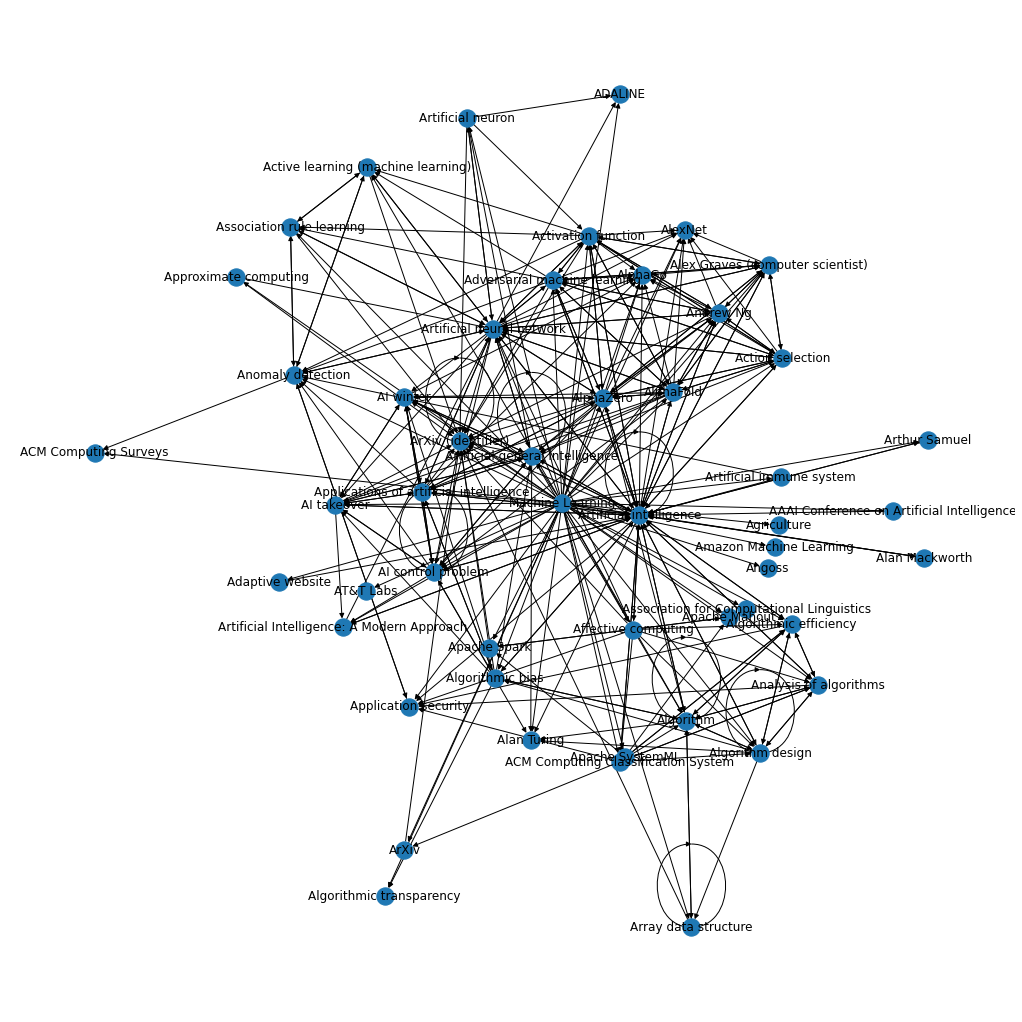

In [ ]:
import matplotlib.pyplot as plt
plt.figure(3,figsize=(14,14))
nx.draw_kamada_kawai(g, with_labels=True)

**Question 2**: Let's do the same. This time for "Data Science!"

**Question 2.1**: Using Wikipedia, go to "Data Science" subject.

In [ ]:
w = wikipedia.page("Data Science")
w.summary

'Data science is an interdisciplinary field that uses scientific methods, processes, algorithms and systems to extract or extrapolate knowledge and insights from noisy, structured and unstructured data, and apply knowledge from data across a broad range of application domains. Data science is related to data mining, machine learning, big data, computational statistics and analytics.Data science is a "concept to unify statistics, data analysis, informatics, and their related methods" in order to "understand and analyse actual phenomena" with data. It uses techniques and theories drawn from many fields within the context of mathematics, statistics, computer science, information science, and domain knowledge. However, data science is different from computer science and information science. Turing Award winner Jim Gray imagined data science as a "fourth paradigm" of science (empirical, theoretical, computational, and now data-driven) and asserted that "everything about science is changing 

**Question 2.2**: Print the first 20 links from this Wikipedia page.

In [ ]:
w.links[:20]

['Academic discipline',
 'Algorithm',
 'American Statistical Association',
 'Analysis',
 'Analytics',
 'Andrew Gelman',
 'Astronomical survey',
 'Basic research',
 'Ben Fry',
 'Big data',
 'Boston',
 'Boston Globe',
 'Business',
 'Buzzword',
 'C. F. Jeff Wu',
 'Columbia University',
 'Comet NEOWISE',
 'Committee on Data for Science and Technology',
 'Communication',
 'Complex systems']

**Question 2.3**: Create edges for the first 50 links. 

In [ ]:
verticies = set(w.links[:50])
links = [("Data Science", l) for l in verticies]

for v in verticies:
    try:
        w = wikipedia.page(v)
        for v2 in w.links:
            if v2 in verticies:
                links.append((v,v2))    
    except Exception as e:
        print(e)


/usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py:389: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


"date" may refer to: 
Date (fruit)
Dating
Group dating
Play date
Meeting
Calendar date
Old Style and New Style dates
ISO 8601
Date (metadata)
system time
Chronological dating
Radiometric dating
Date (band)
"Date" (song)
Date Records
episode of the British sitcom Miranda
Dates (TV series)
"Dates" (Only Fools and Horses)
Date, Fukushima
Date District, Fukushima
Date, Hokkaido
Date, South Dakota
Date City, California
Dateland, Arizona
Date (surname)
Date clan
Design Automation and Test in Europe
All pages with titles beginning with Date
All pages with titles containing Date
Blind date (disambiguation)
Dating (disambiguation)
Double date (disambiguation)
Mystery Date (disambiguation)
Page id "data maining" does not match any pages. Try another id!


**Question 2.4**: Build the graph using NetworkX. 
Print number of edges and nodes.

In [ ]:
import networkx as nx
%matplotlib inline 
g = nx.DiGraph()
g.add_edges_from(set(links))
nx.info(g)

'DiGraph with 51 nodes and 626 edges'

**Question 2.5**: Draw the graph.

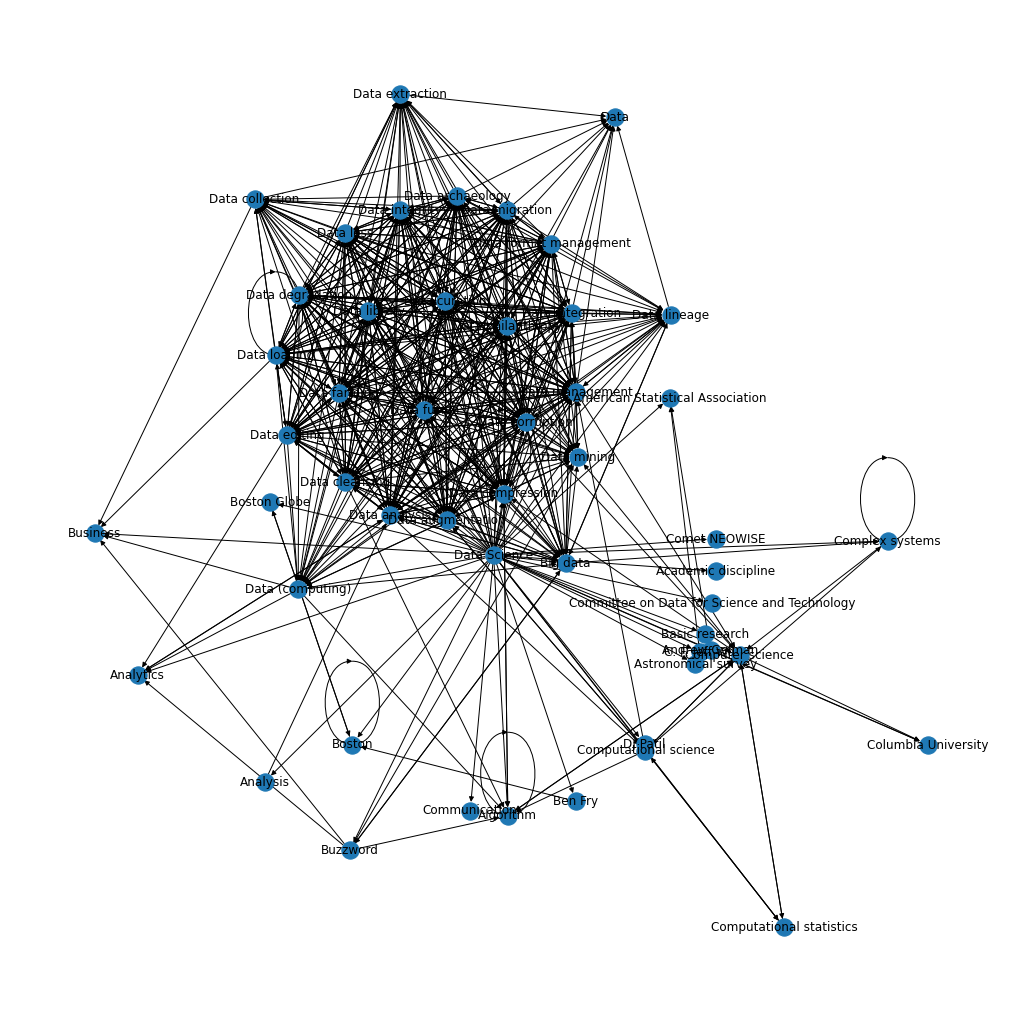

In [ ]:
import matplotlib.pyplot as plt
plt.figure(3,figsize=(14,14))
nx.draw_kamada_kawai(g, with_labels=True)

## 3. Working with Pandas

In [ ]:
!mkdir /root/.kaggle/
import json
import os

# Installing the Kaggle package
!pip install kaggle 


# creating kaggle.json file with the personal API-Key details 
# You can also put this file on your Google Drive
with open('/root/.kaggle/kaggle.json', 'w') as file:
  json.dump(api_token, file)
!chmod 600 /root/.kaggle/kaggle.json

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Creating a dataset directory
!mkdir ./datasets
!mkdir ./datasets/netflix

# download the dataset from Kaggle and unzip it
!kaggle datasets download chasewillden/netflix-shows -p ./datasets/netflix/
!chdir ./datasets/netflix
!unzip ./datasets/netflix/*.zip  -d ./datasets/netflix
!ls ./datasets/netflix

  0% 0.00/10.6k [00:00<?, ?B/s]
100% 10.6k/10.6k [00:00<00:00, 7.28MB/s]
/bin/bash: chdir: command not found
Archive:  ./datasets/netflix/netflix-shows.zip
  inflating: ./datasets/netflix/Netflix Shows.csv  
'Netflix Shows.csv'   netflix-shows.zip


Now, let's load the shows data into a DataFrame Object:

In [ ]:
import pandas as pd
import numpy as np

First, we load the Netflix Shows csv to a _Pandas DataFrame object_:

In [ ]:
df = pd.read_csv('./datasets/netflix/Netflix Shows.csv', encoding='cp437' )
df

,title,rating,ratingLevel,ratingDescription,release year,user rating score,user rating size
0,White Chicks,PG-13,"crude and sexual humor, language and some drug...",80,2004,82.0,80
1,Lucky Number Slevin,R,"strong violence, sexual content and adult lang...",100,2006,NaN,82
2,Grey's Anatomy,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2016,98.0,80
3,Prison Break,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2008,98.0,80
4,How I Met Your Mother,TV-PG,Parental guidance suggested. May not be suitab...,70,2014,94.0,80
...,...,...,...,...,...,...,...
995,The BFG,PG,"for action/peril, some scary moments and brief...",60,2016,97.0,80
996,The Secret Life of Pets,PG,for action and some rude humor,60,2016,NaN,81
997,Precious Puppies,TV-G,Suitable for all ages.,35,2003,NaN,82
998,Beary Tales,TV-G,Suitable for all ages.,35,2013,NaN,82


Let's use lambda function for creating new column for decade.

In [ ]:
df['decade'] = df['release year'].apply(lambda year: year - (year%10))
df

,title,rating,ratingLevel,ratingDescription,release year,user rating score,user rating size,decade
0,White Chicks,PG-13,"crude and sexual humor, language and some drug...",80,2004,82.0,80,2000
1,Lucky Number Slevin,R,"strong violence, sexual content and adult lang...",100,2006,NaN,82,2000
2,Grey's Anatomy,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2016,98.0,80,2010
3,Prison Break,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2008,98.0,80,2000
4,How I Met Your Mother,TV-PG,Parental guidance suggested. May not be suitab...,70,2014,94.0,80,2010
...,...,...,...,...,...,...,...,...
995,The BFG,PG,"for action/peril, some scary moments and brief...",60,2016,97.0,80,2010
996,The Secret Life of Pets,PG,for action and some rude humor,60,2016,NaN,81,2010
997,Precious Puppies,TV-G,Suitable for all ages.,35,2003,NaN,82,2000
998,Beary Tales,TV-G,Suitable for all ages.,35,2013,NaN,82,2010



### Seaborn


In [ ]:
!pip install seaborn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


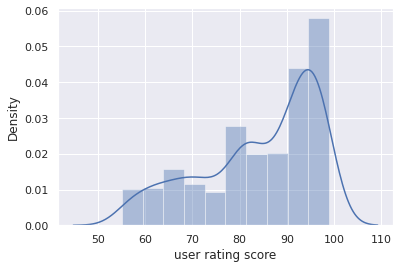

In [ ]:
import seaborn as sns 
c = c[np.logical_not(np.isnan(c))] # removes NaN
sns.set(style="darkgrid")
sns.distplot(c)

We can also visualize other interesting statistics, such as the rating histogram for each decade in just few lines of code:

In [ ]:
import matplotlib.pyplot as plt
#df['decade'] = df['release year'] - df['release year'] % 10 # add a decade column
df = df[df['decade'] >= 1980] # select only rows with decade larger or equal 1980

In [ ]:
df

,title,rating,ratingLevel,ratingDescription,release year,user rating score,user rating size,decade
0,White Chicks,PG-13,"crude and sexual humor, language and some drug...",80,2004,82.0,80,2000
1,Lucky Number Slevin,R,"strong violence, sexual content and adult lang...",100,2006,NaN,82,2000
2,Grey's Anatomy,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2016,98.0,80,2010
3,Prison Break,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2008,98.0,80,2000
4,How I Met Your Mother,TV-PG,Parental guidance suggested. May not be suitab...,70,2014,94.0,80,2010
...,...,...,...,...,...,...,...,...
995,The BFG,PG,"for action/peril, some scary moments and brief...",60,2016,97.0,80,2010
996,The Secret Life of Pets,PG,for action and some rude humor,60,2016,NaN,81,2010
997,Precious Puppies,TV-G,Suitable for all ages.,35,2003,NaN,82,2000
998,Beary Tales,TV-G,Suitable for all ages.,35,2013,NaN,82,2010


**Question 4.2:** Make a histogram for release year

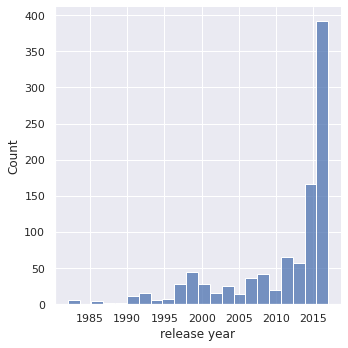

In [ ]:
import seaborn as sns
release_year = df['release year']
release_year = release_year[np.logical_not(np.isnan(release_year))]
sns.set(style='darkgrid')
sns.displot(release_year)

Let's select only movies that were released after 2016:

In [ ]:
df2 = df[df['release year'] > 2016]
df2.shape  # we can get the number of columns and indexes

(100, 8)

We can add a decade column:

In [ ]:
df['decade'] = df['release year'].apply(lambda y: y - y%10)
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,title,rating,ratingLevel,ratingDescription,release year,user rating score,user rating size,decade
title,,,,,,,,
White Chicks,White Chicks,PG-13,"crude and sexual humor, language and some drug...",80,2004,82.0,80,2000
Lucky Number Slevin,Lucky Number Slevin,R,"strong violence, sexual content and adult lang...",100,2006,NaN,82,2000
Grey's Anatomy,Grey's Anatomy,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2016,98.0,80,2010
Prison Break,Prison Break,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2008,98.0,80,2000
How I Met Your Mother,How I Met Your Mother,TV-PG,Parental guidance suggested. May not be suitab...,70,2014,94.0,80,2010
...,...,...,...,...,...,...,...,...
The BFG,The BFG,PG,"for action/peril, some scary moments and brief...",60,2016,97.0,80,2010
The Secret Life of Pets,The Secret Life of Pets,PG,for action and some rude humor,60,2016,NaN,81,2010
Precious Puppies,Precious Puppies,TV-G,Suitable for all ages.,35,2003,NaN,82,2000


**Question 4.1.1**: Let's select only movies that were released before 1990.

In [ ]:
df3 = df[df['release year'] < 1990]
df3

,title,rating,ratingLevel,ratingDescription,release year,user rating score,user rating size,decade
title,,,,,,,,
The Super Mario Bros. Super Show!,The Super Mario Bros. Super Show!,TV-Y7,Suitable for children ages 7 and older,41,1989,NaN,82,1980
Annie,Annie,PG,adult content and mld violence,60,1982,68.0,80,1980
An American Tail,An American Tail,G,General Audiences. Suitable for all ages.,35,1986,67.0,80,1980
The Last Unicorn,The Last Unicorn,G,General Audiences. Suitable for all ages.,35,1982,NaN,82,1980
An American Tail,An American Tail,G,General Audiences. Suitable for all ages.,35,1986,67.0,80,1980
An American Tail,An American Tail,G,General Audiences. Suitable for all ages.,35,1986,67.0,80,1980
The Last Unicorn,The Last Unicorn,G,General Audiences. Suitable for all ages.,35,1982,NaN,82,1980
Harry and the Hendersons,Harry and the Hendersons,PG,Parental guidance suggested. May not be suitab...,60,1987,58.0,80,1980
Annie,Annie,PG,adult content and mld violence,60,1982,68.0,80,1980


### 4.2 Using Groupby 

Similar to SQL, Pandas also has a groupby functionality.
Namely, we can use _groupby_ function to create a _DataFrameGroupBy_
object:

In [ ]:
df3 = df[['user rating score','decade', "release year"]]
df3 = df3.dropna()
g = df3.groupby("decade")
g

We can access each group directly using the *get_group* function:

In [ ]:
g.get_group(2010)

,user rating score,decade,release year
title,,,
Grey's Anatomy,98.0,2010,2016
How I Met Your Mother,94.0,2010,2014
Supernatural,95.0,2010,2016
Breaking Bad,97.0,2010,2013
The Vampire Diaries,91.0,2010,2017
...,...,...,...
Growing Up Wild,80.0,2010,2016
Paddington,70.0,2010,2014
Dawn of the Croods,72.0,2010,2017


Or iterate over the groups:

In [ ]:
d = {}
for y, year_df in g:
    d[y] = year_df
d[2010]

,user rating score,decade,release year
title,,,
Grey's Anatomy,98.0,2010,2016
How I Met Your Mother,94.0,2010,2014
Supernatural,95.0,2010,2016
Breaking Bad,97.0,2010,2013
The Vampire Diaries,91.0,2010,2017
...,...,...,...
Growing Up Wild,80.0,2010,2016
Paddington,70.0,2010,2014
Dawn of the Croods,72.0,2010,2017


In [ ]:
g.max()

,user rating score,release year
decade,,
1980,80.0,1989
1990,96.0,1999
2000,98.0,2009
2010,99.0,2017


In [ ]:
g.describe()

user rating score                                                      \
                   count       mean        std   min   25%   50%   75%   max   
decade                                                                         
1980                10.0  66.800000   6.088240  58.0  67.0  67.0  68.0  80.0   
1990                73.0  79.808219   9.974492  64.0  71.0  81.0  86.0  96.0   
2000                94.0  83.010638  13.907911  55.0  74.0  89.0  95.0  98.0   
2010               423.0  85.638298  11.873709  55.0  79.0  91.0  95.5  99.0   

       release year                                                          \
              count         mean       std     min     25%     50%      75%   
decade                                                                        
1980           10.0  1985.300000  2.451757  1982.0  1983.0  1986.0  1986.75   
1990           73.0  1996.164384  2.608819  1990.0  1994.0  1997.0  1998.00   
2000           94.0  2004.978723  2.873605  2000.0  2003.0  2006.0  2007.00   
2010          423.0  2015.200946  1.667873  2010.0  2015.0  2016.0  2016.00   

                
           max  
decade          
1980    1989.0  
1990    1999.0  
2000    2009.0  
2010    2017.0

decade
1980    AxesSubplot(0.125,0.125;0.775x0.755)
1990    AxesSubplot(0.125,0.125;0.775x0.755)
2000    AxesSubplot(0.125,0.125;0.775x0.755)
2010    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

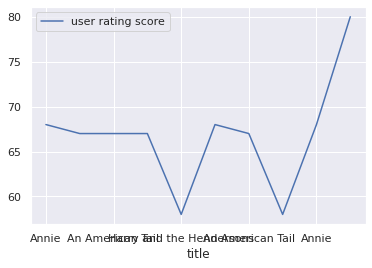

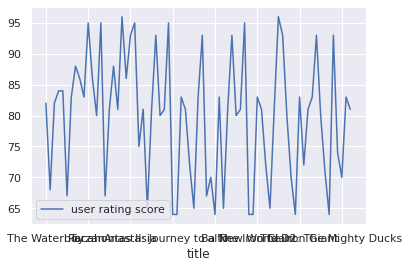

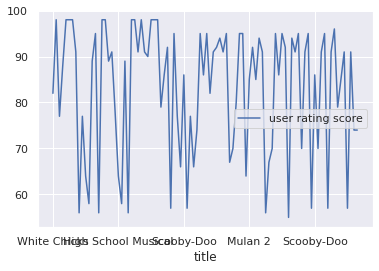

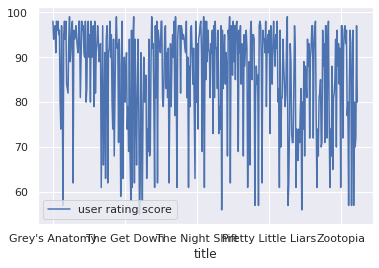

In [ ]:
g.plot( y='user rating score')

**Question 4.2.1**: Create a new dataframe includes only the folllowing features:  'ratingDescription','decade', 'release year'. Remove Null values and group by decade.

In [ ]:
df4= df[['ratingDescription','decade','release year']]
df4= df4.dropna()
g=df4.groupby("decade")
g

**Question 4.2.2**:Choose group od decade 1980.

In [ ]:
g.get_group(1980)

,ratingDescription,decade,release year
title,,,
The Super Mario Bros. Super Show!,41,1980,1989
Annie,60,1980,1982
An American Tail,35,1980,1986
The Last Unicorn,35,1980,1982
An American Tail,35,1980,1986
An American Tail,35,1980,1986
The Last Unicorn,35,1980,1982
Harry and the Hendersons,60,1980,1987
Annie,60,1980,1982


**Question 4.2.3**: Execute the max function on the group.

In [ ]:
g.max()

,ratingDescription,release year
decade,,
1980,60,1989
1990,80,1999
2000,110,2009
2010,124,2017


**Question 4.2.4**: plot the g object by "user rating score".

decade
1980    AxesSubplot(0.125,0.125;0.775x0.755)
1990    AxesSubplot(0.125,0.125;0.775x0.755)
2000    AxesSubplot(0.125,0.125;0.775x0.755)
2010    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

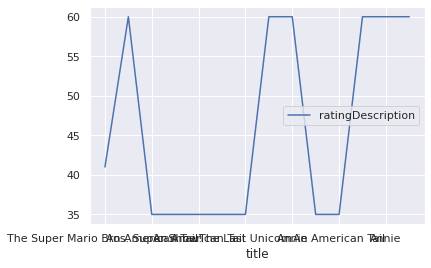

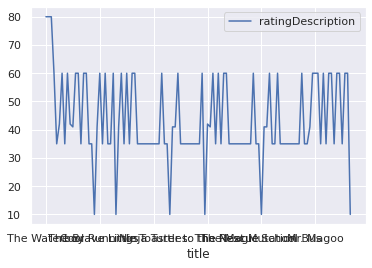

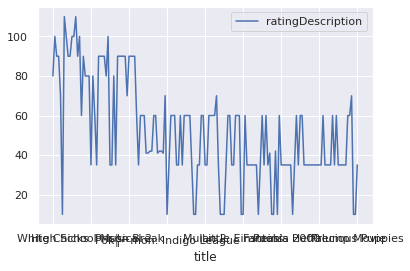

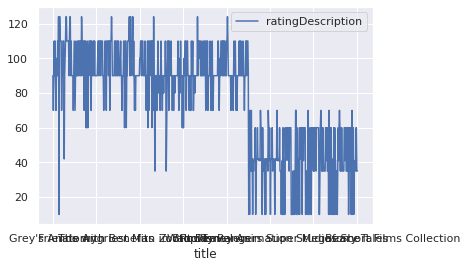

In [ ]:
g.plot(y='ratingDescription')

In [ ]:
pd.__version__

'1.3.5'

## 5. Real-World Examples

## 5.1 Emmy Awards Dataset

Let's downlpad at the [Prime Time Emmy Awards Dataset](https://www.kaggle.com/pmagda/primetime-emmy-awards) to try to discover some interesting insights:

In [ ]:
# Creating a dataset directory
!cd /content
!mkdir ./datasets/emmy
!cd ./datasets/emmy

# download the dataset from Kaggle and unzip it
!kaggle datasets download pmagda/primetime-emmy-awards  -p ./datasets/emmy
!unzip ./datasets/emmy/*.zip  -d ./datasets/emmy
!ls ./datasets/emmy

mkdir: cannot create directory ‘./datasets/emmy’: File exists
primetime-emmy-awards.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  ./datasets/emmy/primetime-emmy-awards.zip
replace ./datasets/emmy/emmy-awards-1949-2017.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: ./datasets/emmy/emmy-awards-1949-2017.csv  
emmy-awards-1949-2017.csv  primetime-emmy-awards.zip


In [ ]:
import pandas as pd
%matplotlib inline 
df = pd.read_csv("./datasets/emmy/emmy-awards-1949-2017.csv")
df

,year,category,winner,nominee,detail
0,1949,Technical Award,1,Charles Mesak/Don Lee TV for Phasefader - In R...,NaN
1,1949,Best Film Made For Television,0,Christopher Columbus,CBS
2,1949,Best Film Made For Television,0,Hollywood Brevities,CBS
3,1949,Best Film Made For Television,0,It Could Happen To You,CBS
4,1949,Best Film Made For Television,0,Tell Tale Heart,CBS
...,...,...,...,...,...
19234,2017,"Outstanding Production Design For Variety, Non...",0,"Bill Nye Saves The World - ""Earth Is A Hot Mess""",Netflix
19235,2017,"Outstanding Production Design For Variety, Non...",0,"Drunk History - ""Hamilton""",Comedy Central
19236,2017,"Outstanding Production Design For Variety, Non...",0,"Portlandia - ""Fred's Cell Phone Company""",IFC
19237,2017,"Outstanding Production Design For Variety, Non...",1,"Saturday Night Live - ""Host: Alec Baldwin""",NBC


Let's see how many Emmy Award winner we have over the years:

In [ ]:
g = df[['year', 'winner']].groupby('year')
g.get_group(1952)
type(g)
g

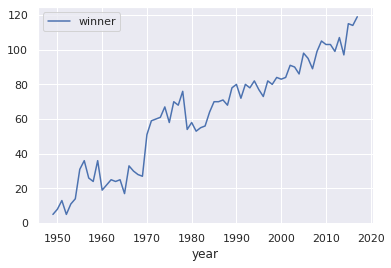

In [ ]:
g.sum().plot(y="winner")

In [ ]:
winners_df = df[df['winner'] != 0]
winners_df

,year,category,winner,nominee,detail
0,1949,Technical Award,1,Charles Mesak/Don Lee TV for Phasefader - In R...,NaN
5,1949,Best Film Made For Television,1,The Necklace (Your Show Time Series),CBS
11,1949,Most Outstanding Television Personality,1,Shirley Dinsdale,NaN
18,1949,Most Popular Television Program,1,Pantomime Quiz Time,KTLA
22,1949,Special Award,1,Louis McManus For His Original Design of the Emmy,NaN
...,...,...,...,...,...
19218,2017,Outstanding Innovation In Interactive Programming,1,PEARL,NaN
19220,2017,Outstanding Music Supervision,1,"Big Little Lies - ""You Get What You Need""",HBO
19228,2017,Outstanding Original Interactive Program,1,The People's House - Inside The White House Wi...,Samsung / Oculus
19231,2017,Outstanding Picture Editing For Variety Progra...,1,"Last Week Tonight With John Oliver - ""F*ck 201...",HBO


Let's count the nominees and use plot chart.

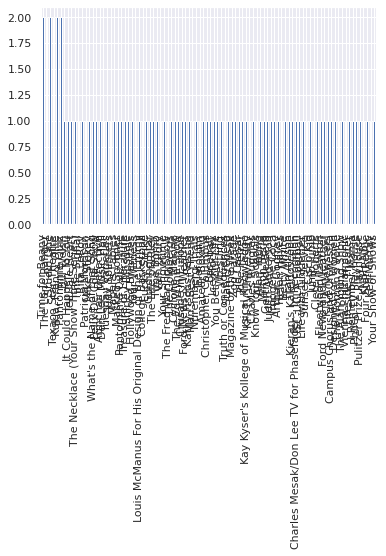

In [ ]:
df.head(100)['nominee'].value_counts().sort_values(ascending=False).plot(kind='bar')

**Question 5.1.1** Create a plot for the first 100 rows on detail (The companies).

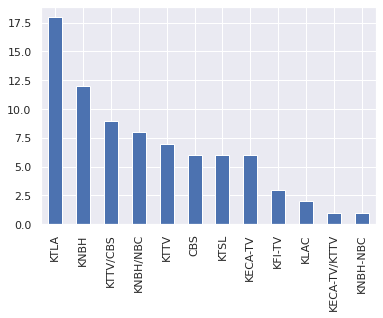

In [ ]:
df.head(100)['detail'].value_counts().sort_values(ascending=False).plot(kind='bar')

## 5.2 Lord of the Rings Dataset

In this example, we will use the [Lord of the Rings Datasets](https://www.kaggle.com/paultimothymooney/lord-of-the-rings-data),
which include character data, as well as script data. First, let's download the dataset:

In [ ]:
# Creating a dataset directory
!cd /content
!mkdir ./datasets/ltor
!cd ./datasets/ltor

# download the dataset from Kaggle and unzip it
!kaggle datasets download paultimothymooney/lord-of-the-rings-data  -p ./datasets/ltor
!unzip ./datasets/ltor/*.zip  -d ./datasets/ltor
!ls ./datasets/ltor

mkdir: cannot create directory ‘./datasets/ltor’: File exists
lord-of-the-rings-data.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  ./datasets/ltor/lord-of-the-rings-data.zip
replace ./datasets/ltor/lotr_characters.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: ./datasets/ltor/lotr_characters.csv  
replace ./datasets/ltor/lotr_scripts.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: ./datasets/ltor/lotr_scripts.csv  
lord-of-the-rings-data.zip  lotr_characters.csv  lotr_scripts.csv


In [ ]:
import re 
import numpy as np
import pandas as pd
import networkx as nx

df = pd.read_csv("./datasets/ltor/lotr_characters.csv")
df = df.fillna('')
df

,birth,death,gender,hair,height,name,race,realm,spouse
0,,,Female,,,Adanel,Men,,Belemir
1,TA 2978,"February 26 ,3019",Male,Dark (book) Light brown (movie),,Boromir,Men,,
2,,"March ,3019",Male,,,Lagduf,Orcs,,
3,TA 280,TA 515,Male,,,Tarcil,Men,Arnor,Unnamed wife
4,,,Male,,,Fire-drake of Gondolin,Dragon,,
...,...,...,...,...,...,...,...,...,...
906,"Mid ,First Age",FA 495,Female,,,Aerin,Men,,Brodda
907,,,,,,Aerandir,,,
908,"YT during the ,Noontide of Valinor",FA 455,Male,Golden,,Aegnor,Elves,,"Loved ,Andreth but remained unmarried"
909,TA 2917,TA 3010,Male,,,Adrahil II,Men,,Unnamed wife


Let's count the number of characters of each race and gender:

In [ ]:
g = df.groupby(['race', 'gender'])
#g.size()# create a Series 
g.size().to_frame(name='counts').sort_values('counts', ascending=0)

,,counts
race,gender,
Men,Male,334
,,137
Hobbits,Male,89
Elves,Male,76
Men,Female,51
...,...,...
Dragon,Male,1
Black Uruk,Male,1
Hobbits,male,1


Let's draw the spouse network. First, let's clean out the data and create a DataFrame object in which we have all the couples' data organized:


In [ ]:
import re
def normailze_spouse(s):
    if s in {'','Unnamed wife', 'None' }:
        return None
    if "Loved" not in s:
        return s
    
    r = re.compile("Loved ,(\w+)")
    l = r.findall(s)
    if len(l) > 0:
        return l[0]
df['norm_spouse'] = df['spouse'].apply(lambda s: normailze_spouse(s))
    
links_df = df[['name', 'norm_spouse', 'race', 'gender']]
links_df = links_df.dropna()
links_df


,name,norm_spouse,race,gender
0,Adanel,Belemir,Men,Female
7,Angrod,Eldalótë,Elves,Male
10,Ar-Pharazôn,Tar-Míriel,Men,Male
12,Ar-Gimilzôr,Inzilbêth,Men,Male
21,Tarannon Falastur,Berúthiel,Men,Male
...,...,...,...,...
897,Ailinel,Orchaldor,Men,Female
898,Almarian,Tar-Meneldur,Men,Female
899,Algund,None known,Men,Male
906,Aerin,Brodda,Men,Female


In [ ]:
links_df2 = pd.merge(links_df, links_df, left_on="name", right_on="norm_spouse")
links_df2


,name_x,norm_spouse_x,race_x,gender_x,name_y,norm_spouse_y,race_y,gender_y
0,Adanel,Belemir,Men,Female,Belemir,Adanel,Men,Male
1,Angrod,Eldalótë,Elves,Male,Eldalótë,Angrod,Elves,Female
2,Ar-Pharazôn,Tar-Míriel,Men,Male,Tar-Míriel,Ar-Pharazôn,Men,Female
3,Ar-Gimilzôr,Inzilbêth,Men,Male,Inzilbêth,Ar-Gimilzôr,Men,Female
4,Tarannon Falastur,Berúthiel,Men,Male,Berúthiel,Tarannon Falastur,Men,Female
...,...,...,...,...,...,...,...,...
122,Amroth,Nimrodel,Elves,Male,Nimrodel,Amroth,Elves,Female
123,Amarië,Finrod,Elves,Female,Finrod,Amarië,Elves,Male
124,Ailinel,Orchaldor,Men,Female,Orchaldor,Ailinel,Men,Male
125,Almarian,Tar-Meneldur,Men,Female,Tar-Meneldur,Almarian,Men,Male


In [ ]:
links_df2 = links_df2[["name_x","race_x", "gender_x", "name_y", "race_y", "gender_y"]]
links_df2

,name_x,race_x,gender_x,name_y,race_y,gender_y
0,Adanel,Men,Female,Belemir,Men,Male
1,Angrod,Elves,Male,Eldalótë,Elves,Female
2,Ar-Pharazôn,Men,Male,Tar-Míriel,Men,Female
3,Ar-Gimilzôr,Men,Male,Inzilbêth,Men,Female
4,Tarannon Falastur,Men,Male,Berúthiel,Men,Female
...,...,...,...,...,...,...
122,Amroth,Elves,Male,Nimrodel,Elves,Female
123,Amarië,Elves,Female,Finrod,Elves,Male
124,Ailinel,Men,Female,Orchaldor,Men,Male
125,Almarian,Men,Female,Tar-Meneldur,Men,Male


In [ ]:
g = nx.Graph()

for i, r in links_df2.iterrows():
    g.add_node(r['name_x'],race=r["race_x"], gender=r["gender_x"])
    g.add_node(r['name_y'],race=r["race_y"], gender=r["gender_y"])
    edges_list = [(r['name_x'], r['name_y']) for i, r in links_df2.iterrows()]

g.add_edges_from(edges_list)


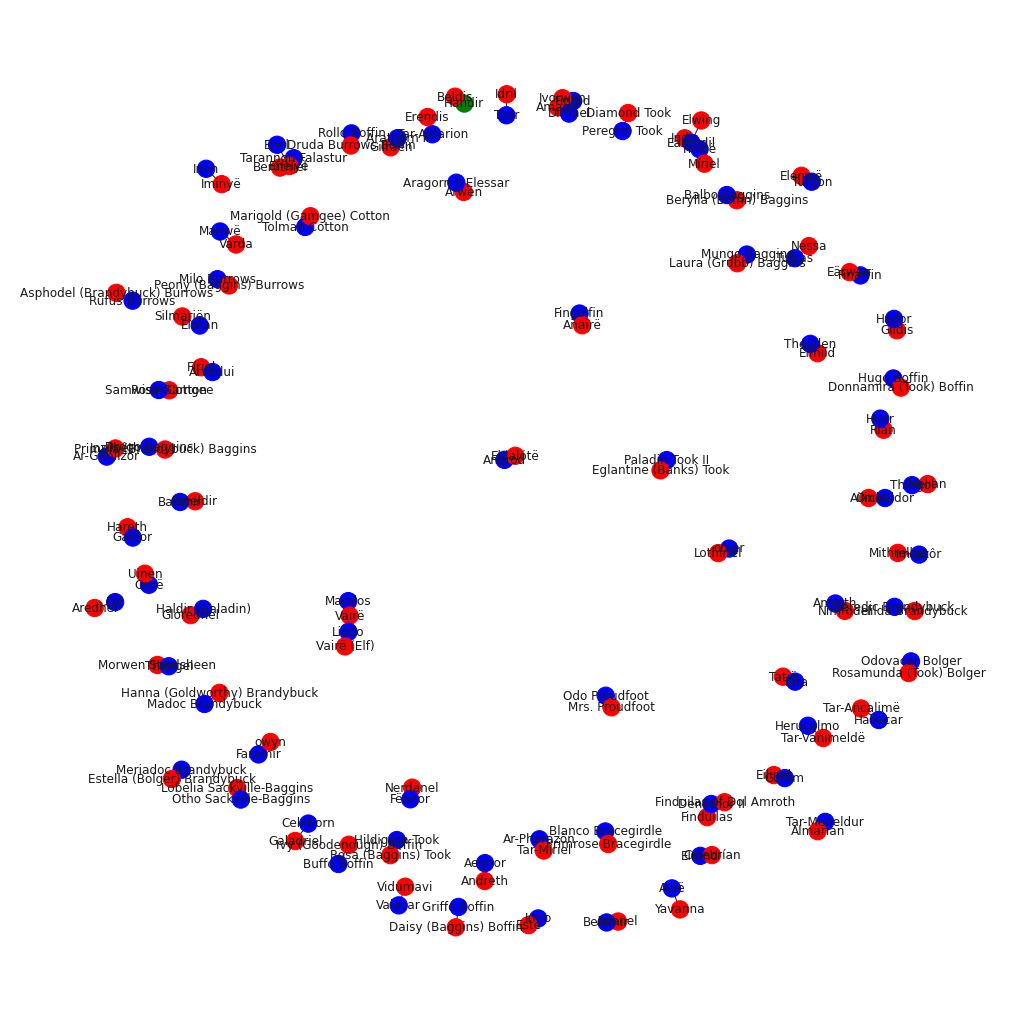

In [ ]:
import matplotlib.pyplot as plt

node_colors = []
# add node color by gender
for node in g.nodes(data=True):

    if node[1]['gender'] == "Male":
        node_colors.append('blue')
    elif node[1]['gender'] == "Female":
        node_colors.append('red')
    else:
        node_colors.append('green')


plt.figure(3,figsize=(14,14))
nx.draw_spring(g, with_labels=True, node_color=node_colors)

We can also draw the vertices to have different shapes according to each character race. 
We will show how todo this later in the course.